<a href="https://colab.research.google.com/github/Shankar530/Phase-2/blob/main/Movie_Recommandation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Description Length Stats:
count     10.000000
mean      93.900000
std       11.140018
min       81.000000
25%       85.500000
50%       88.500000
75%      104.250000
max      112.000000
Name: description_length, dtype: float64


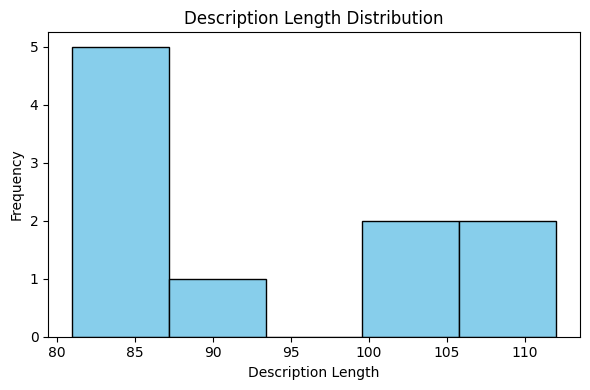


🎬 Movies similar to 'Inception':
0       Interstellar
1    The Dark Knight
2       The Prestige
3            Memento
4         The Matrix
Name: title, dtype: object


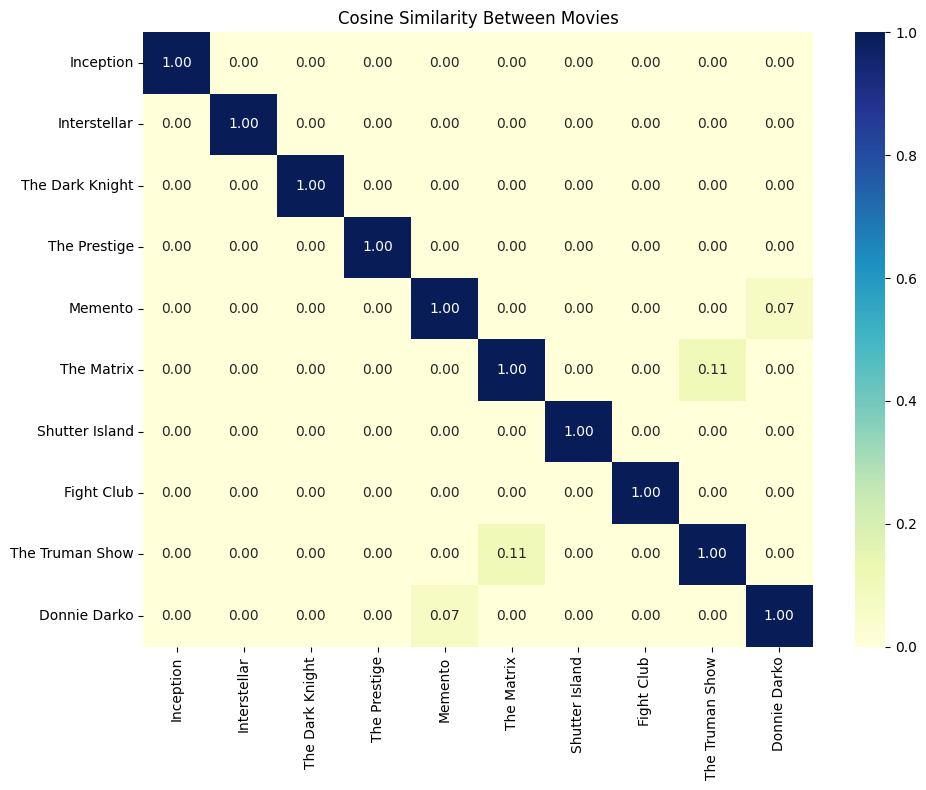

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from io import StringIO

# Step 1: Data Collection (CSV embedded directly)
csv_data = StringIO("""title,description
Inception,"A thief who steals corporate secrets through the use of dream-sharing technology."
Interstellar,"A team of explorers travel through a wormhole in space to ensure humanity's survival."
The Dark Knight,"Batman sets out to dismantle the remaining criminal organizations that plague Gotham City."
The Prestige,"Two rival stage magicians engage in a battle to create the ultimate illusion while sacrificing everything."
Memento,"A man with short-term memory loss uses tattoos and notes to hunt for his wife’s killer."
The Matrix,"A hacker discovers that the world he lives in is a simulation and joins a rebellion."
Shutter Island,"A U.S. Marshal investigates the disappearance of a prisoner from a hospital for the criminally insane."
Fight Club,"An insomniac office worker and a soapmaker form an underground fight club that evolves into something much more."
The Truman Show,"An insurance salesman discovers his whole life is a TV show and struggles with reality."
Donnie Darko,"A troubled teenager is plagued by visions of a man in a rabbit suit who manipulates him to commit crimes."
""")

df = pd.read_csv(csv_data)

# Step 2: Data Cleaning
df.dropna(subset=['description'], inplace=True)

# Step 3: Exploratory Data Analysis (EDA)
df['description_length'] = df['description'].apply(len)
print("\nDescription Length Stats:")
print(df['description_length'].describe())

# Plot description length distribution
plt.figure(figsize=(6, 4))
plt.hist(df['description_length'], bins=5, color='skyblue', edgecolor='black')
plt.title("Description Length Distribution")
plt.xlabel("Description Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 4: Feature Engineering (TF-IDF)
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['description'])

# Step 5: Model Building (Cosine Similarity)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 6: Model Evaluation (Recommendation Function)
def recommend_movie(title, num_recommendations=3):
    if title not in df['title'].values:
        return f"Movie titled '{title}' not found in the dataset."

    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices].reset_index(drop=True)

# Example: Get recommendations for 'Inception'
print("\n🎬 Movies similar to 'Inception':")
print(recommend_movie("Inception", 5))

# Step 7: Visualization & Interpretation
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim, xticklabels=df['title'], yticklabels=df['title'], cmap='YlGnBu', annot=True, fmt=".2f")
plt.title("Cosine Similarity Between Movies")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()